# Drone equations

## content
1. euler angles
2. quadrotoor dynamics
3. forces and moments
4. actuator dynamics
5. state space model
6. linear model
7. liniarization
8. controlabillity and observability


In [48]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import sys
# !{sys.executable} -m pip install control
import control as ct


### euler angles

t-pitch
r-roll
y-yaw

from world coordinates to body coordinate(write rb in means of rw):

Rz=

        (cos(t), sin(t)

        -sin(t), cos(t))

from body coordinates to world coordinate(by transposing):

Rz=

        (cos(t), -sin(t)

        sin(t), cos(t))

and the full rotation matrix, which will give us rw from rb for ZYX order:

R=

        (c(t)c(y), s(r)s(t)c(y)-c(r)s(y), c(r)s(t)c(y)+s(r)s(y),

        c(t)s(y), s(r)s(t)s(y)+c(r)c(y), c(r)s(t)s(y)-s(r)c(y),

        -s(t)  , s(r)c(t)             , c(r)c(t))




In [49]:
def rot_matrix(r,t,y):
    st,ct=np.sin(t),np.cos(t)
    sr,cr=np.sin(r),np.cos(r)
    sy,cy=np.sin(y),np.cos(y)

    R=np.array(
        [[ct*cy, sr*st*cy-cr*sy, cr*st*cy+sr*sy],\
        [ct*sy, sr*st*sy+cr*cy, cr*st*sy-sr*cy],\
        [-st  , sr*ct             , cr*ct]])
    
    return R

In [50]:
t=0
y=90*np.pi/180
r=0

R=rot_matrix(r,t,y)
# print(R)

rb=np.array([1,0,0])

print(R@rb)


[6.123234e-17 1.000000e+00 0.000000e+00]


### quadrottor matematical model

#### velocities and angular velocities in earth frame
v= 

    [dx,
    
    dy,
    
    dz ]

w= 

    [droll,
    
    dpitch,
    
    dyaw ]

#### velocities and rotations rates in body frame
vb= 

    [u,
    
    v,
    
    w ]

#### body rotation rates
w= 

    [p,
    
    q,
    
    r ]


v=R*vb

w=T*wb

where T is different then R because the euler angles are in different frames and not only in body and earth frame.

T=

        (1, s(r)*tan(t), c(r)*tan(t)
        
        0, c(r)        , -s(r)
        
        0, s(r)/c(t)   , c(r)/c(t))

In [51]:
# euler and body rates

def eul_body_rates(r, t, y):
      
    st,ct=np.sin(t),np.cos(t)
    sr,cr=np.sin(r),np.cos(r)
    sy,cy=np.sin(y),np.cos(y)   
    
    T=np.array([[1, sr*np.tan(t), cr*np.tan(t)],\
        [0, cr        , -sr],\
        [0, sr/ct   , cr/ct]])

    return T

In [52]:
t=0*np.pi/180
y=0*np.pi/180
r=-90*np.pi/180

T=eul_body_rates(r,t,y)
print(T)

wb=np.array([0,1,0])

print(T@wb)

[[ 1.000000e+00 -0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17  1.000000e+00]
 [ 0.000000e+00 -1.000000e+00  6.123234e-17]]
[ 0.000000e+00  6.123234e-17 -1.000000e+00]


### Forces and moments


m(wb X vb + dvb)=fb

I*dwb + wb X (I*wb)=Tb

-->(comes from dervitive of I*wb=H, dH=Tb) 

will get: 

    fx = m(du + q*w - r*v)

    fy = m(dv + r*u - p*w)

    fz = m(dw + p*v - q*u)

    Mx = Ix*dp - q*r*Iy + q*r*Iz

    My = Iy*dq - p*r*Ix + p*r*Iz

    Mz = Iz*dr - p*q*Ix + p*q*Iy

### types of forces


fb = m*g*R^*ez - ft*e3 + fw

Mb = Tb + ga + Tw

ga = Jp1(wbXe3)(-1)*Omega_1 + Jp2(wbXe3)(+1)*Omega_2 + Jp3(wbXe3)(-1)*Omega_3 + Jp4(wbXe3)(1)*Omega_4

Tb - control moments

ga - gyroscopic moments from the rottors 

Tw - wind moments
          

### 1d design

T1   T2
 \ | /
  \|/
  / \
 /   \
T3    T4

dyaw = (T13 - T24)/I 

az = (T13 + T24)/m - g + wind

In [53]:
m=1
I=1
g=10

def az_func(T13,T24,wind):
    return (T13+T24)/m - g +wind

def dyaw_func(T13,T24):
    return (T13+T24)/I

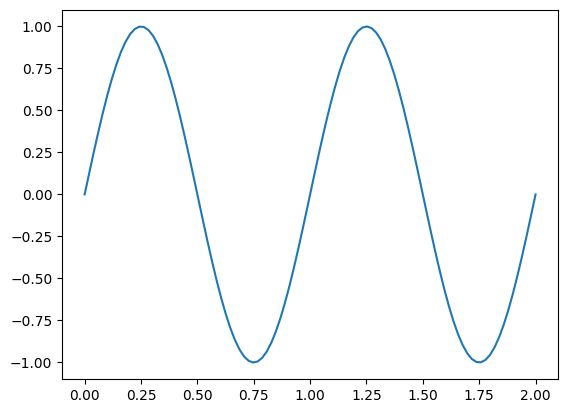

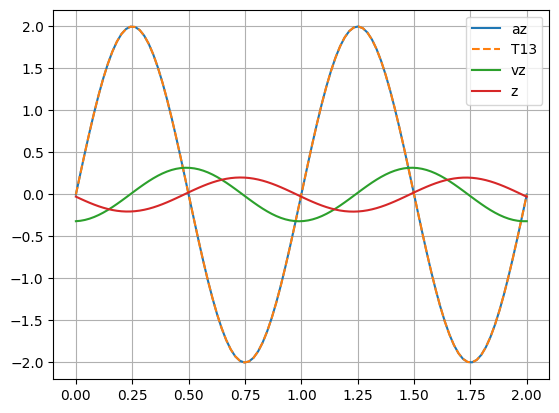

In [54]:
f=1

t=np.linspace(0,2,100)
T13,T24=np.sin(t*f*np.pi*2), np.sin(t*f*np.pi*2)


plt.plot(t,T13)
plt.show()

plt.plot(t,az_func(T13,T24,10),t, T13+T24,'--')
vz=np.cumsum(az_func(T13,T24,10)*np.mean(np.diff(t)))
# vz=vz-max(vz)/2
plt.plot(t,vz)
plt.plot(t,np.cumsum(vz*np.mean(np.diff(t)))*4)
plt.legend(['az','T13','vz','z'])
plt.grid()
plt.show()

